Clustering is process of grouping objects with similar objects. The difference between clustering and classification models is that clustering is an unsupervised method where training is done without labels and classification is supervised method where training require labeling.

In [4]:
import pandas as pd

data = pd.read_csv('seeds.csv')
features = data[data.columns[0:6]]
features.sample(5)

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient
114,20.97,17.25,0.8859,6.563,3.991,4.677
75,16.77,15.62,0.8638,5.927,3.438,4.920
34,15.05,14.68,0.8779,5.712,3.328,2.129
93,18.59,16.05,0.9066,6.037,3.860,6.001
106,18.85,16.17,0.9056,6.152,3.806,2.843


The dataset contains six features for each observation of a seed. Six-dimensional space is difficult to visualize in a three-dimensional world, or on a two-dimensonal plot, so we will take advantage of a mathematical technique call PCA Principal Component Analysis.

In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

scaled_features = MinMaxScaler().fit_transform(features[data.columns[0:6]])

#Get two principal components
pca = PCA(n_components=2).fit(scaled_features)
features_2d = pca.transform(scaled_features)
features_2d[0:10]


array([[ 0.11883593, -0.09382469],
       [ 0.0696878 , -0.31077233],
       [-0.03499184, -0.37044705],
       [-0.06582089, -0.36365235],
       [ 0.32594892, -0.37695797],
       [-0.02455447, -0.31060184],
       [-0.00769646, -0.07594931],
       [-0.05646955, -0.26696284],
       [ 0.38196305, -0.05149471],
       [ 0.35701044, -0.17697998]])

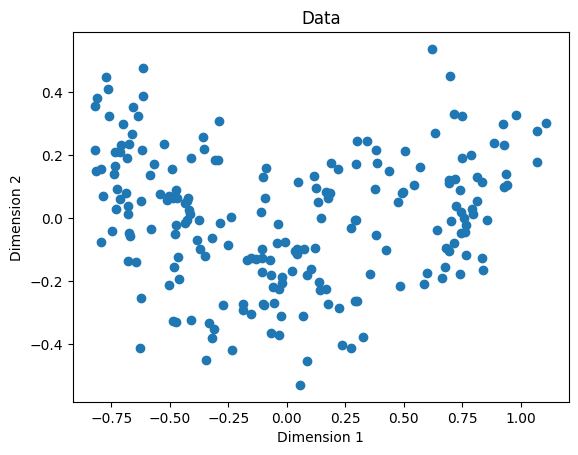

In [8]:
#visualize data points (features) 

import matplotlib.pyplot as plt

plt.scatter(features_2d[:,0],features_2d[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data')
plt.show()

The main idea about how to interpret PCA plots:
- Seed features that are highly correlated cluster together
- The axes are ranked in order of importance
- Differences along the first principal component axis (PC1) are more important than differences along the second principle component axis (PC2)

A metric often used to measure this tightness is the within cluster sum of squares (WCSS), with the lower values meaning that the data points are closer.

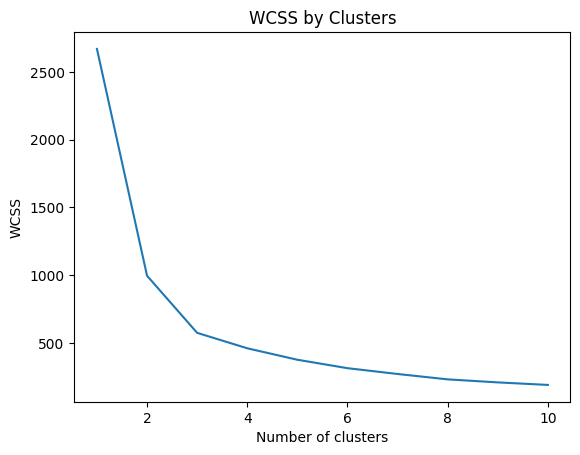

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#create 10 model with 1 to 10 clusters
wcss = []
for i in range (1,11):
    kmeans = KMeans(n_clusters=i)
    #fit the data points
    kmeans.fit(features.values)
    #get the WCSS value
    wcss.append(kmeans.inertia_)

#Plot the WCSS values onto a line graph
plt.plot(range(1, 11), wcss)
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Start with raw data:
- step 1: select the number of clusters we want to identify in data. This is the K in K-means clustering
- step 2: randomly select 3 distict data points. These are initial clusters
- step 3: measure the distance between the 1st point and the 3 initial clusters
- step 4: assign the 1st point to the nearest cluster. Do the same thing to the next points
- step 5: calculate the mean of each cluster

repeat (measure and cluster) using the mean values. since K means clusterng cant see the best clustering, its only option is to keep track of these clusters, and their total variance, and do the whole thing over again with different starting points.

when the data are clustered, we sum the variation within each cluster and do again. 

to decide the value of K is try different values for K. each time we add new cluster, the total variation within each cluster is smaller than before and when there is only one point per cluster, the variation is 0.

the difference between K mean clustering and hierarchical clustering: K means clustering specifically tries to put the data into the number of clusters we tell it to. Hierarchica clustering just tells you pariwise what two things are most similar (Hierarchical clustering is another type of clustering algorithm in which clusters themselves belong to a larger group, which belong to even larger groups, and so on. The result is that data points can be clusters in differing degrees of precision: with a large number of very small and precise groups, or a small number of larger groups).

The plot shows a large reduction in WCSS (so greater tightness) as the number of clusters increases from one to two, and a further noticable reduction from two to 3 clusters. After that, the reduction is less pronounced resulting in an elbow in the chart at around 3 clusters. This is a good indication that there are two to three reasonably well separated clusters of data points

**Train and evaluate advanced clustering models**

In [16]:
#Clustering - K-means and Hierachial

#create a model based on 3 centroids
model = KMeans(n_clusters=3, init='k-means++', n_init=100, max_iter=1000)
# Fit to the data and predict the cluster assignments for each data point
km_clusters = model.fit_predict(features.values)
# View the cluster assignments
km_clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0])

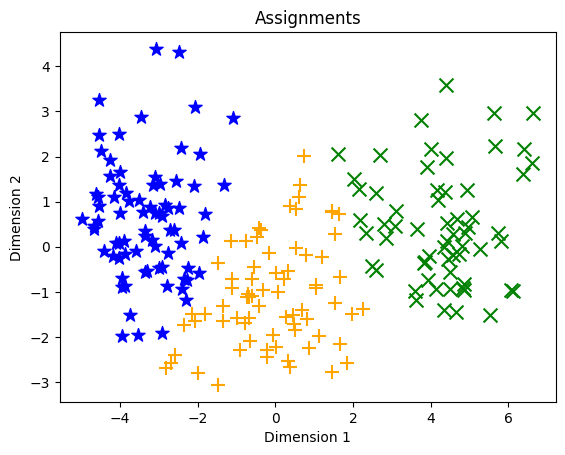

In [18]:
def plot_clusters(samples, clusters):
    col_dic = {0:'blue',1:'green',2:'orange'}
    mrk_dic = {0:'*',1:'x',2:'+'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker=markers[sample], s=100)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Assignments')
    plt.show()

plot_clusters(features_2d, km_clusters)

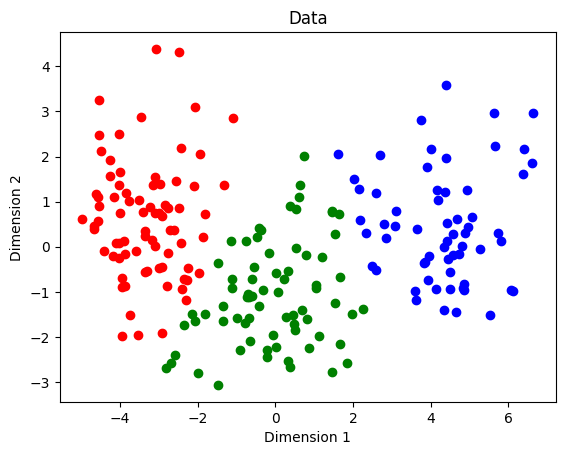

In [19]:
#or we can combine all the steps
import matplotlib.pyplot as plt

# Create a KMeans model with the optimal number of clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(features.values)
labels = kmeans.predict(features.values)

# Get the 2D coordinates of the data points after applying PCA
pca = PCA(n_components=2)
features_2d = pca.fit_transform(features.values)

# Plot the data points with different colors for each cluster
colors = ['red', 'blue', 'green']  # Add more colors if needed for additional clusters
for i in range(len(labels)):
    plt.scatter(features_2d[i, 0], features_2d[i, 1], color=colors[labels[i]])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data')
plt.show()


We encoded as 0 (Kama), 1 (Rosa), or 2 (Canadian), so we can use these identifiers to compare the species classifications to the clusters identified by our unsupervised algorithm

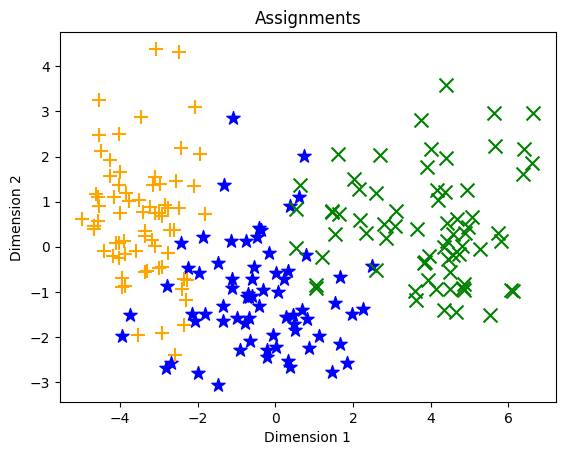

In [23]:
seed_species = data[data.columns[7]]
plot_clusters(features_2d, seed_species.values)